# Dataset: House Prices - Advanced Regression Techniques


**short description of the dataset:** The dataset provided contains information about individual residential properties. It includes 79  variables that describes various aspects of residential homes,such as siz, condition of numerous features and the sales price of each property. This dataset was initially part of a Kaggle competition aimed at predicting house prices, making it a well-known benchmark in real estate data analysis.

**why I am interested in it:** The dataset includes a diverse set of features. This richness allows for a multifaceted analysis and the application of various data preprocessing techniques, feature engineering, and selection methods. There is real world application of prediciting housing prices with this dataset.

**link to where others can access the data:** [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

**link to documentation about the data:** [documentation](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)





### Importing Libraries and Data:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import image_dataset_from_directory
from scikeras.wrappers import KerasRegressor
import nltk
import gensim
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import keras_tuner as kt
import scipy.stats as stats
from sklearn.impute import SimpleImputer

# Ensure the necessary NLTK datasets are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# To avoid duplicate import warnings
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


2024-06-08 23:09:58.279061: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to /Users/jess/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jess/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the dataset
data_file_path = 'data.csv'

data = pd.read_csv(data_file_path)

Check the dataset

In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Display summary statistics of the dataset
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [5]:
# Display the first few rows of the dataset
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### Data Pre-Processing


In [6]:
# Separate features and target
x = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [7]:
# Encode categorical variables for machine learning algorithms
cat_cols = x.select_dtypes(include='object').columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

x_encoded = pd.DataFrame(encoder.fit_transform(x[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x.drop(cat_cols, axis=1), x_encoded], axis=1)


In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Impute missing values
num_cols = x_train.select_dtypes(include=np.number).columns

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

x_train[num_cols] = imputer_num.fit_transform(x_train[num_cols])
x_test[num_cols] = imputer_num.transform(x_test[num_cols])

x_train[x_encoded.columns] = imputer_cat.fit_transform(x_train[x_encoded.columns])
x_test[x_encoded.columns] = imputer_cat.transform(x_test[x_encoded.columns])

In [10]:
# Check for missing values after imputation
missing_values_train = x_train.isnull().sum()
missing_values_test = x_test.isnull().sum()

# Display the missing values
print("Missing values in the training set after imputation:\n", missing_values_train)
print("\nMissing values in the test set after imputation:\n", missing_values_test)

Missing values in the training set after imputation:
 Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 262, dtype: int64

Missing values in the test set after imputation:
 Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 262, dtype: int64


The imputation was successful, and there are no remaining missing values in either the training or test datasets.

### Basic Statistical Analysis and Visualization

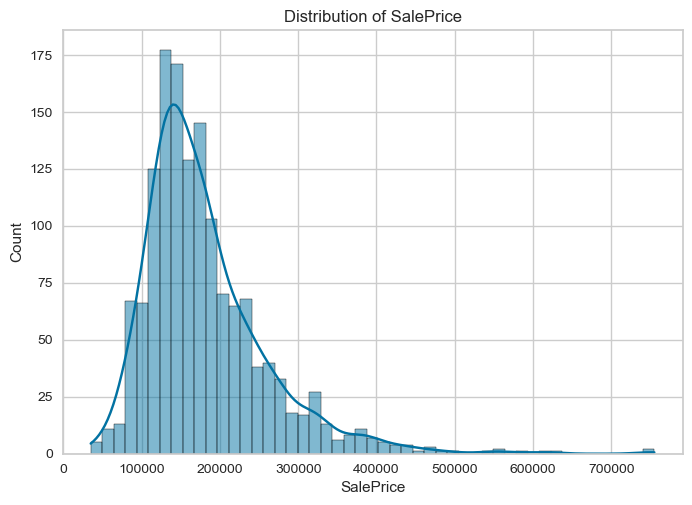

In [11]:
# Distribution of the target variable
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.show()

This graph shows that most properties are sold within the $100,000 to $200,000 range. There is a decrease in frequency as the sale price increases, and there are a few high-priced outliers.

/var/folders/ld/xxfmp0q94klfqb8hcz2t6d7r0000gn/T/ipykernel_3705/382114357.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


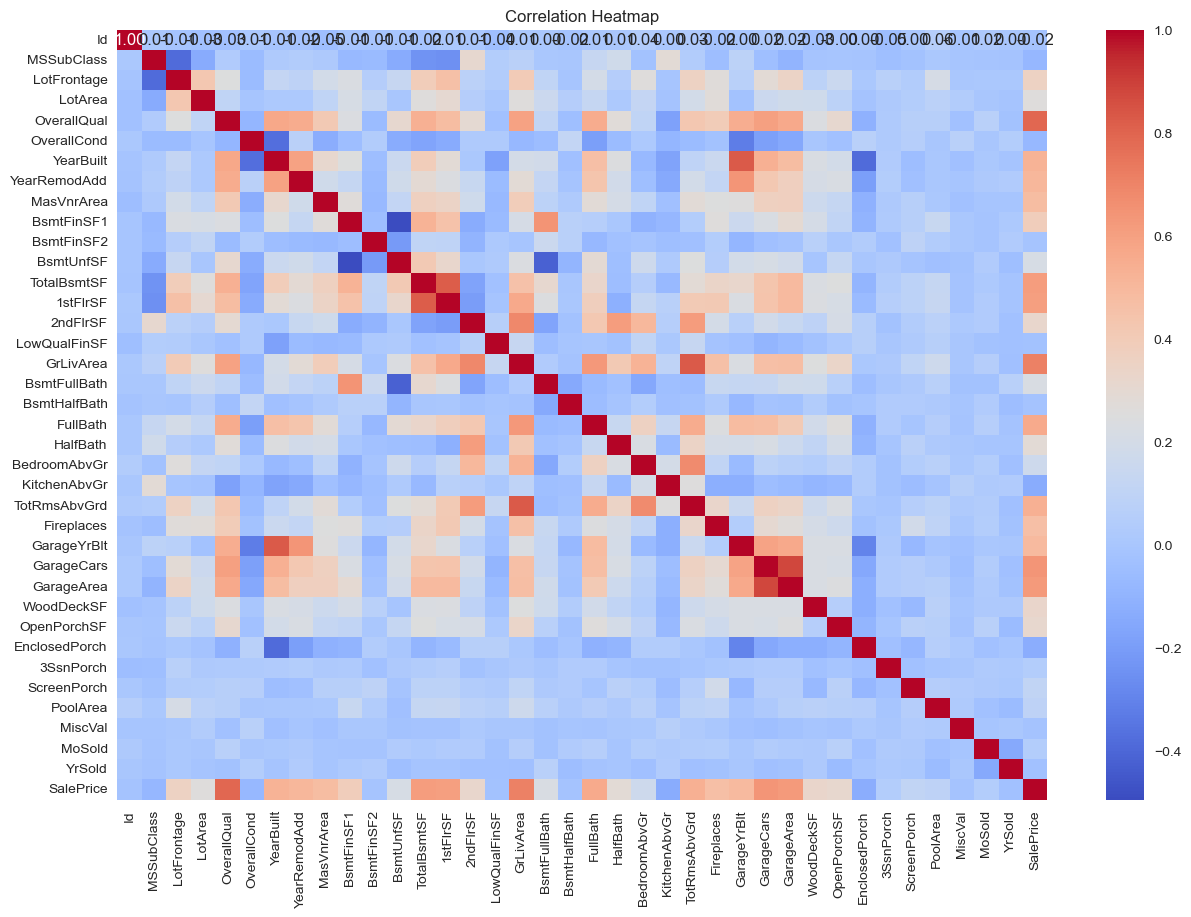

In [12]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation with SalePrice:
 - OverallQual: Shows a strong positive correlation with SalePrice (darker red).
 - GrLivArea: Also has a strong positive correlation with SalePrice.
 - GarageCars and GarageArea: Both show positive correlations with SalePrice.

Many variables show weak or no significant correlation with SalePrice or with other variables, indicated by the light colors

In [13]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with the target variable (SalePrice)
corr_with_target = corr_matrix["SalePrice"].abs().sort_values(ascending=False)
print(corr_with_target)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

/var/folders/ld/xxfmp0q94klfqb8hcz2t6d7r0000gn/T/ipykernel_3705/1631579586.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [14]:
# Set a correlation threshold
threshold = 0.3

# Select features with correlation above the threshold
relevant_features = corr_with_target[corr_with_target > threshold].index
print("Selected Features:", relevant_features)

Selected Features: Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')


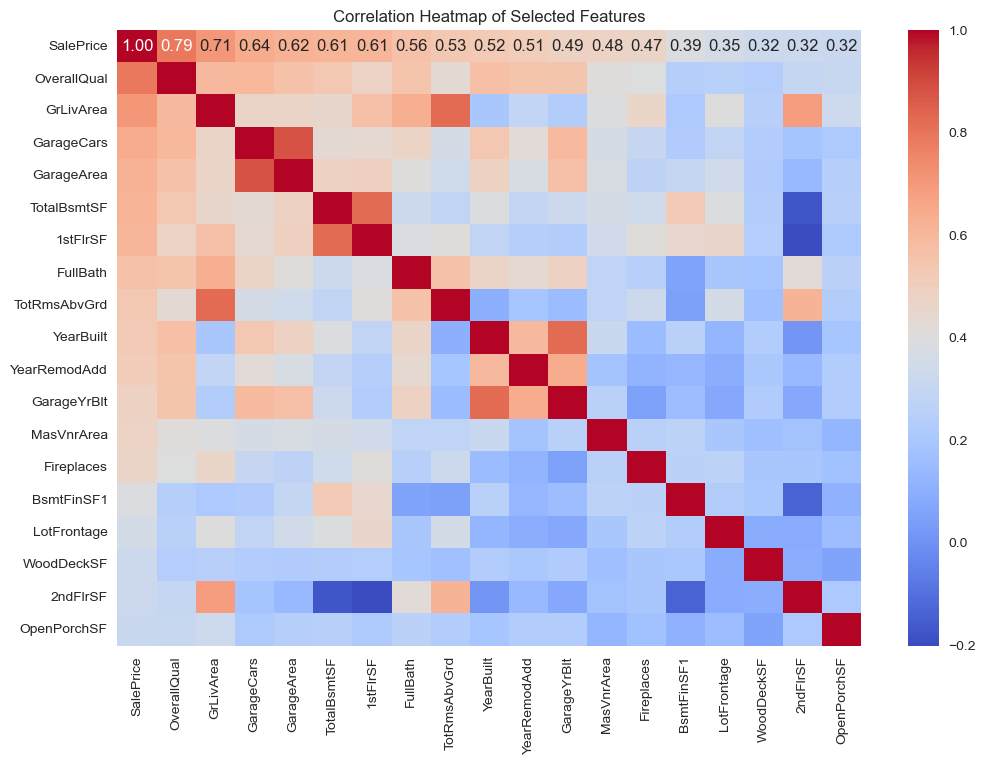

In [15]:
# Filter the correlation matrix to include only the relevant features
filtered_corr_matrix = data[relevant_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

The correlation matrics helps to visualise easier the most significant features influencing SalePrice.

The most impactful are:
 - with overall quality
 - living area
 - garage capacity
 - basement size
 - number of bathrooms

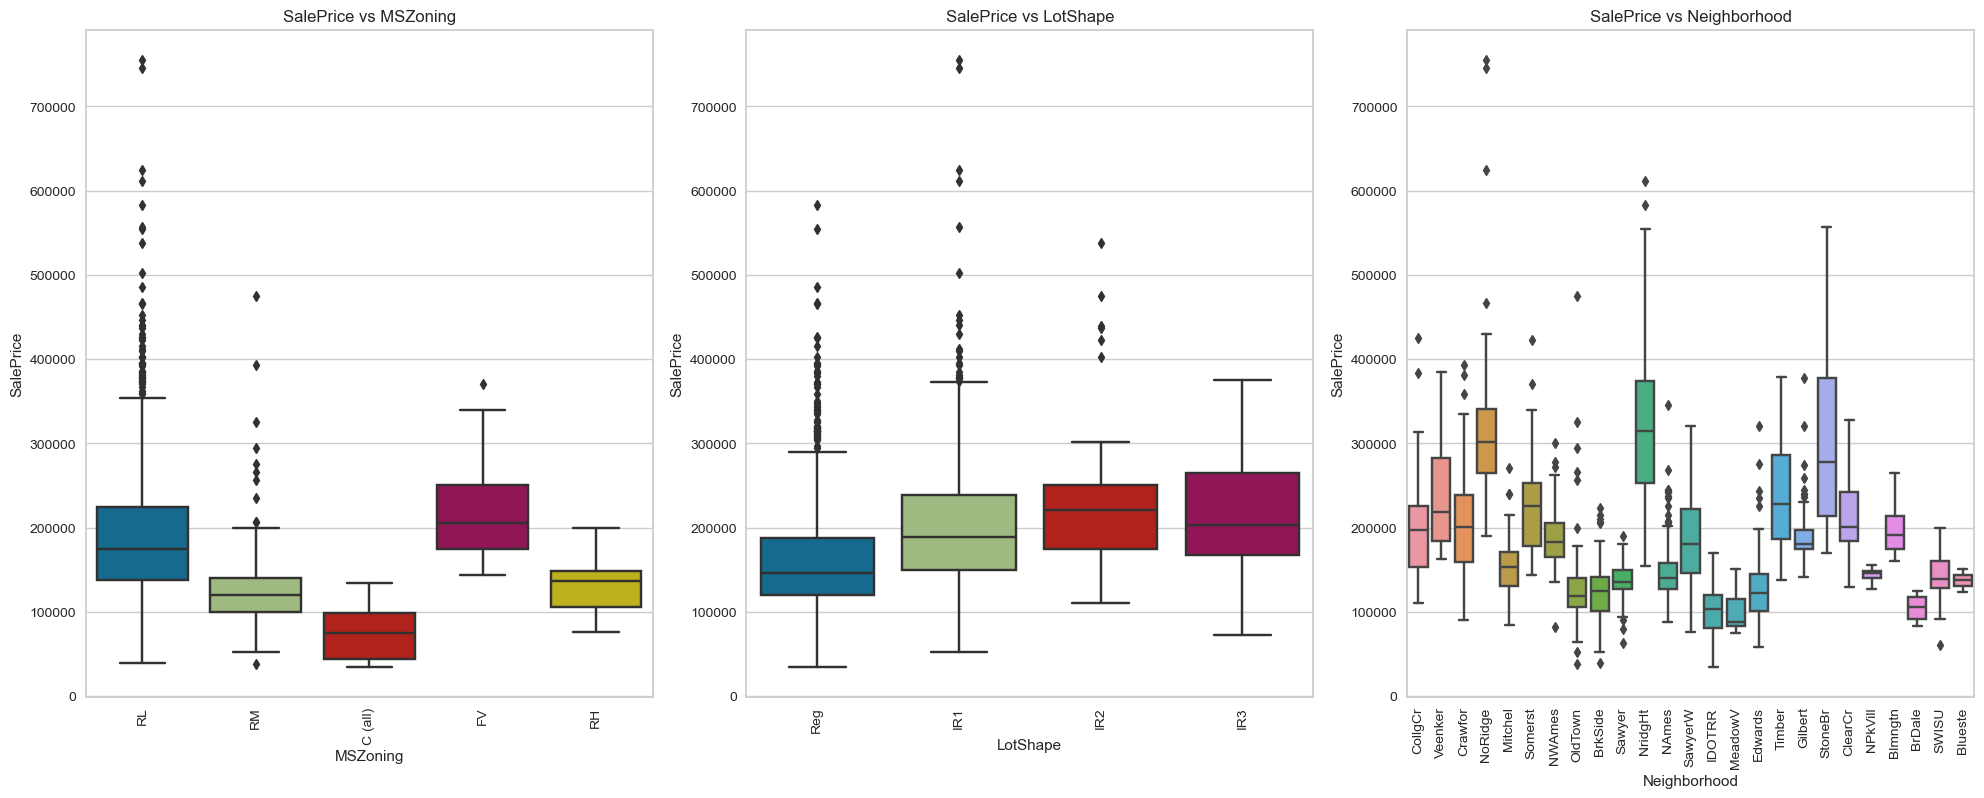

In [16]:
# Box plots for categorical features
cat_features = ['MSZoning', 'LotShape', 'Neighborhood']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(cat_features):
    plt.subplot(len(cat_features) // 3 + 1, 3, i + 1)
    sns.boxplot(x=feature, y='SalePrice', data=data)
    plt.title(f'SalePrice vs {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Interpretation ofthe visuals:

- MSZoning: Sale prices vary  across different zoning categories, with RL and FV showing higher median sale prices and wider spreads.
- LotShape: Regular lot shapes have slightly lower median sale prices compared to irregular shapes, which show higher medians and wider spreads.
- Neighborhood: There is a significant variation in sale prices across neighborhoods, indicating that location is a major factor in property values. High-value neighborhoods have much higher median sale prices and wider distributions compared to low-value neighborhoods.

### Machine Learning Algorithms

## Description of Variables Used for Machine Learning:

 - All numerical and categorical variables were considered, and missing values were imputed.
 - Categorical variables were encoded using OneHotEncoder, and the dataset was split into training and testing sets.
 - For the first attempt of each algorithm, all features will be used then based on the results, feature selection may be used


### XGBoost

In [17]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

In [18]:
xg_reg.fit(x_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [19]:
preds = xg_reg.predict(x_test)

In [20]:
test_score = xg_reg.score(x_test, y_test)
print(f"R2 of XGBoost: {test_score:.2f}")

R2 of XGBoost: 0.67


In [21]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 50049.252374


R² score = 0.67

RMSE = 50049.25. 

This indicates a fairly good model performance, but there might still be room for improvement.

We can improve the model by doing cross validation to find a better set of hyperparameters


#### Cross Validation:

In [22]:
# Parameter grid for cross-validation
xg_reg_cv = xgb.XGBRegressor()

params = {
    "objective": ["reg:squarederror"],
    'colsample_bytree': [0.3],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [5, 10, 20],
    'alpha': [5, 10]
}

In [23]:
# Perform grid search cross-validation
grid_search_cv = GridSearchCV(xg_reg_cv, params, n_jobs=-1, cv=3)
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [5, 10], 'colsample_bytree': [0.3],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [5, 10, 20],
                         'objective': ['reg:squarederror']})

In [24]:
# Best hyperparameters
best_params = grid_search_cv.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'alpha': 10, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'objective': 'reg:squarederror'}


In [25]:
# Evaluate the model with the best hyperparameters
test_score_cv = grid_search_cv.score(x_test, y_test)
print(f"R2 of XGBoost with GridSearchCV: {test_score_cv:.2f}")

y_predict_cv = grid_search_cv.predict(x_test)
rmse_cv = np.sqrt(mean_squared_error(y_test, y_predict_cv))
print("RMSE: %f" % (rmse_cv))

R2 of XGBoost with GridSearchCV: 0.90
RMSE: 27999.132655


By finding better parameters, we have improved the model

#### Feature Selection 

In [26]:
# Initial training to get feature importance
xg_reg_tree = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)

xg_reg_tree.fit(x_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

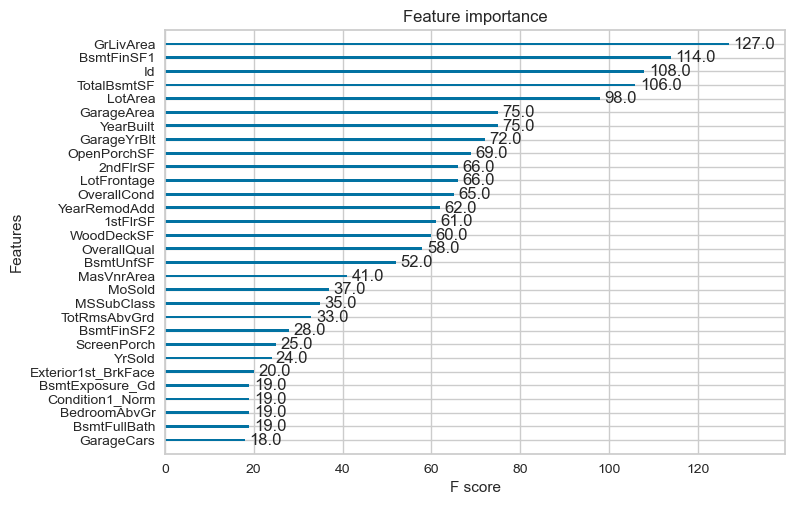

In [27]:
# Plot feature importance
xgb.plot_importance(xg_reg_tree, max_num_features=30)
plt.show()

This bar chart displays the feature importance scores for the model, using the F score of the model. It indicates the relative importance of features in predicting the Sale Price.

In [28]:
# Get feature importance scores
importance = xg_reg_tree.feature_importances_

In [29]:
# Select the most important features
threshold = 0.01  # you can adjust this threshold
important_features = [feature for feature, importance in zip(x_train.columns, importance) if importance > threshold]

In [30]:
# Train a new model with selected features
x_train_selected = x_train[important_features]
x_test_selected = x_test[important_features]

xg_reg_tree.fit(x_train_selected, y_train)
preds = xg_reg_tree.predict(x_test_selected)



In [31]:
# Evaluate the model
test_score_tree = xg_reg_tree.score(x_test_selected, y_test)
print(f"R2 of XGBoost with selected features: {test_score_tree:.2f}")

rmse_tree = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


R2 of XGBoost with selected features: 0.83
RMSE: 50049.252374


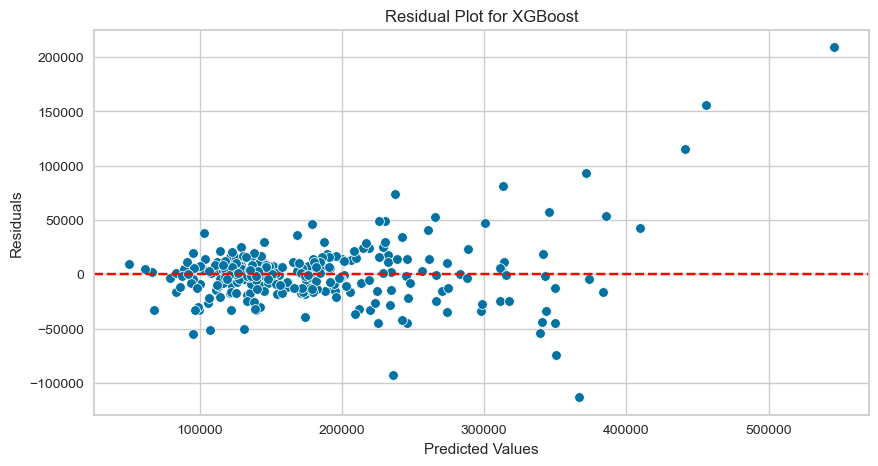

In [32]:
# Predictions from the best XGBoost model
y_pred_xgb = grid_search_cv.predict(x_test)

# Residuals
residuals_xgb = y_test - y_pred_xgb

# Residual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost')
plt.show()

Interpretation of residual plot:

- There is Random Distribution which indicates a good fit as there is no apparent pattern.
- There is no Patterns or Curvature therefore the model is not missing a systematic component.
- There is no Increasing/Decreasing Spread therefore the model has Homoscedasticity.

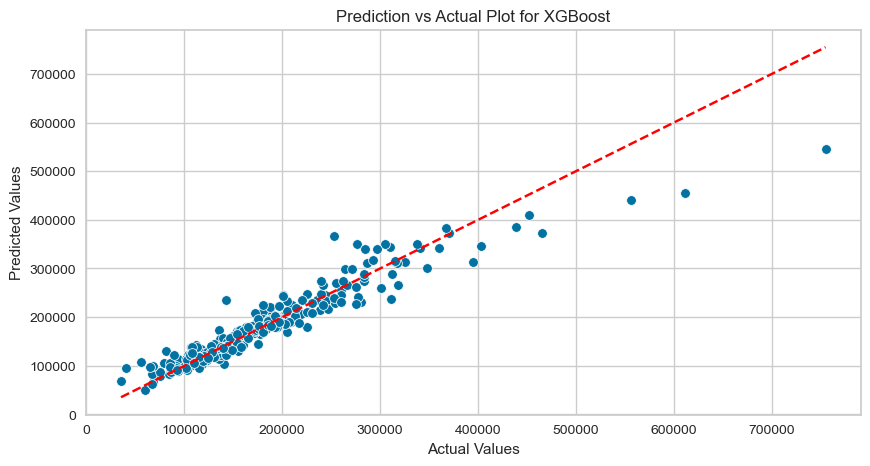

In [33]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot for XGBoost')
plt.show()


Interpretation of prediction vs actual plot

- The points are close to the Diagonal Line which indicates good model performance, as the predicted values closely match the actual values.
- There are no systematic Deviations therefore there are no biases in the model's predictions.
- The aandomscatter around the diagonal line suggests random errors and a good fit overall.

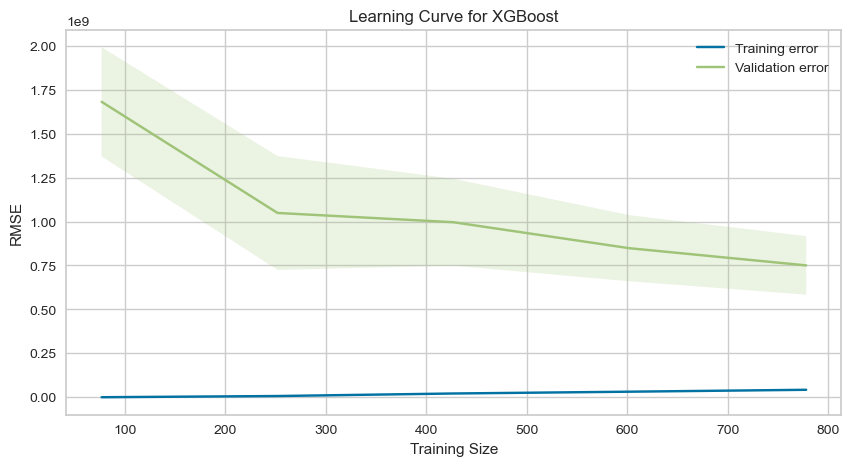

In [34]:
# Learning curve for the best XGBoost model
train_sizes, train_scores, test_scores = learning_curve(grid_search_cv.best_estimator_, x_train, y_train, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Calculate mean and std for training and test scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for XGBoost')
plt.legend()
plt.show()


Interpretation of Learning Curve:

- Converging Training and Validation Scores: Indicates a good fit, where the model generalizes well to new data.
- Gap Between Training and Validation Scores: There is a slight persistent gap which might indicate that more data or regularization is needed to improve the model's performance.
- Converging Lines: The training and validation scores are converging, this indicates that adding more data might not significantly improve the model, and it is likely performing well.

#### Comparing results of all XGBoost Models:

In [35]:
# Results of Original Model
print(f"Original XGBoost Model: {test_score:.2f}, RMSE: {rmse:.2f}")

# Results after GridSearchCV
print(f"GridSearchCV - R2: {test_score_cv:.2f}, RMSE: {rmse_cv:.2f}")

# Results after Tree-Based Feature Importance
print(f"Tree-Based Feature Importance - R2: {test_score_tree:.2f}, RMSE: {rmse_tree:.2f}")

Original XGBoost Model: 0.67, RMSE: 50049.25
GridSearchCV - R2: 0.90, RMSE: 27999.13
Tree-Based Feature Importance - R2: 0.83, RMSE: 36440.28


#### Analysis of the models:
- **GridSearchCV Model**: This model provides the best performance among the three, with the highest R² score (0.90) and the lowest RMSE (27999.13). It indicates that hyperparameter tuning using GridSearchCV significantly improves the model's ability to explain variance and reduce prediction error.
- **Tree-Based Feature Importance Model**: While this model improves upon the original model, it does not perform as well as the GridSearchCV model. However, it still offers a good balance between complexity and performance, especially if computational resources or time are constraints.
- **Original Model**: The baseline performance of the original model is lower compared to the other two, highlighting the importance of hyperparameter tuning and feature selection.


### TensorFlow

Preprocessing to avoid errors

In [36]:
# Convert DataFrame to numpy array
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [37]:
# Check for any remaining null values in the training and test sets
print("Checking for null values in training and test data...")
print(f"Null values in x_train_np: {np.isnan(x_train_np).sum()}")
print(f"Null values in y_train_np: {np.isnan(y_train_np).sum()}")
print(f"Null values in x_test_np: {np.isnan(x_test_np).sum()}")
print(f"Null values in y_test_np: {np.isnan(y_test_np).sum()}")

Checking for null values in training and test data...
Null values in x_train_np: 0
Null values in y_train_np: 0
Null values in x_test_np: 0
Null values in y_test_np: 0


In [38]:
# Fill any remaining null values with the mean of the respective columns
x_train_np = np.nan_to_num(x_train_np, nan=np.nanmean(x_train_np))
y_train_np = np.nan_to_num(y_train_np, nan=np.nanmean(y_train_np))
x_test_np = np.nan_to_num(x_test_np, nan=np.nanmean(x_test_np))
y_test_np = np.nan_to_num(y_test_np, nan=np.nanmean(y_test_np))

#### Model 1: Simple Model

In [39]:
# Create and Define the model
model1 = Sequential()
model1.add(Dense(64, input_dim=x_train_np.shape[1], activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Train the first model
model1.fit(x_train_np, y_train_np, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [41]:
# Evaluate the first model
y_pred1 = model1.predict(x_test_np)
rmse1 = np.sqrt(mean_squared_error(y_test_np, y_pred1))
r2_1 = r2_score(y_test_np, y_pred1)
print(f"Original TensorFlow Model - R2: {r2_1:.2f}, RMSE: {rmse1:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Original TensorFlow Model - R2: 0.71, RMSE: 47441.91


#### Model 2: With Hyperparameter Tuning


In [42]:
# Create and Define the model
def create_model(optimizer='adam', learn_rate=0.01, dropout_rate=0.2, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train_np.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.get({'class_name': optimizer, 'config': {'learning_rate': learn_rate}}), 
                  loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [43]:
# Create the KerasRegressor wrapper
model = KerasRegressor(model=create_model, verbose=0)

In [44]:
# Define the hyperparameter grid
param_grid = {
    'model__neurons': [64],
    'model__dropout_rate': [0.1],
    'model__learn_rate': [0.01],
    'batch_size': [10, 20],
    'epochs': [50]
}

In [45]:
# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_np, y_train_np)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

In [46]:
# Print the best hyperparameters and score
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best cross-validated MSE: {grid_result.best_score_}")

Best parameters: {'batch_size': 10, 'epochs': 50, 'model__dropout_rate': 0.1, 'model__learn_rate': 0.01, 'model__neurons': 64}
Best cross-validated MSE: 0.6568564573923746


In [47]:
# Train the best model on the entire training set
best_model = grid_result.best_estimator_

In [48]:
# Evaluate the second model
y_pred2 = best_model.predict(x_test_np)
rmse2 = np.sqrt(mean_squared_error(y_test_np, y_pred2))
r2_2 = r2_score(y_test_np, y_pred2)
print(f"Cross-validated TensorFlow Model - R2: {r2_2:.2f}, RMSE: {rmse2:.2f}")

Cross-validated TensorFlow Model - R2: 0.80, RMSE: 39494.70


Cross Validation improves the model but it is not a significantly large improvement

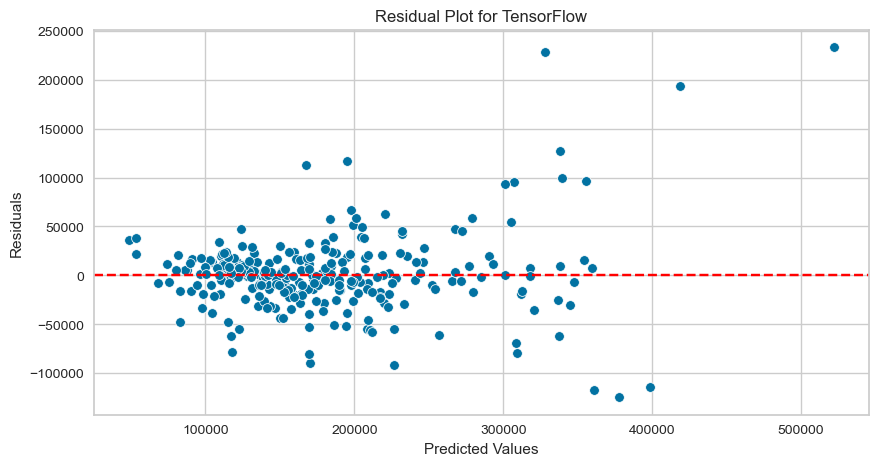

In [49]:
# Predictions from the best TensorFlow model
y_pred_tf = best_model.predict(x_test_np).flatten()

# Residuals
residuals_tf = y_test_np - y_pred_tf

# Residual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_tf, y=residuals_tf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for TensorFlow')
plt.show()

Interpretation of residual plot:

- There is Random Distribution which indicates a good fit as there is no apparent pattern.
- There is no Patterns or Curvature therefore the model is not missing a systematic component.
- There is no Increasing/Decreasing Spread therefore the model has Homoscedasticity.

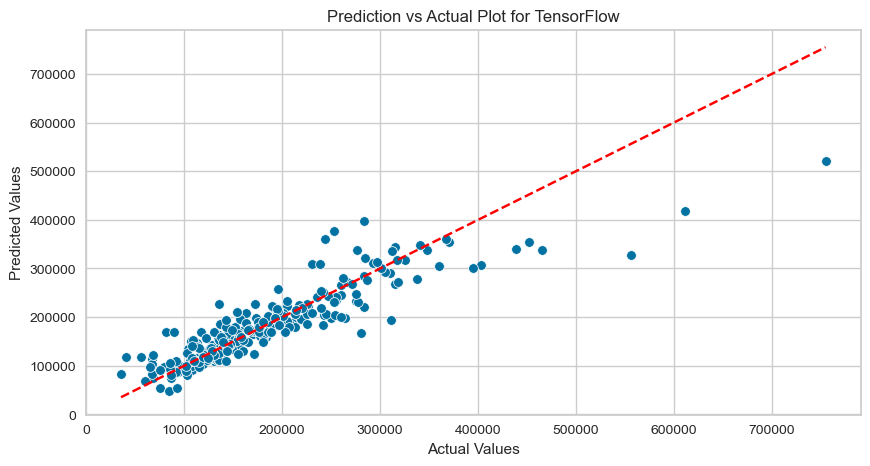

In [50]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_np, y=y_pred_tf)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot for TensorFlow')
plt.show()

Interpretation of prediction vs actual plot

- The points are close to the Diagonal Line which indicates good model performance, as the predicted values closely match the actual values.
- There are no systematic Deviations therefore there are no biases in the model's predictions.
- The aandomscatter around the diagonal line suggests random errors and a good fit overall.

In [51]:
# Comparison of Both Models
comparison_df = pd.DataFrame({
    'Model': ['Original TensorFlow Model', 'Cross-validated TensorFlow Model'],
    'RMSE': [rmse1, rmse2],
    'R2 Score': [r2_1, r2_2]
})

print("Comparison of TensorFlow Models:")
print(comparison_df)

Comparison of TensorFlow Models:
                              Model          RMSE  R2 Score
0         Original TensorFlow Model  47441.914021  0.706566
1  Cross-validated TensorFlow Model  39494.700860  0.796641


#### Comparisson of the two models:
- The **Cross-validated TensorFlow Model** shows better performance than the **Original TensorFlow Model**. The reduction in RMSE suggests that the tuned model makes more accurate predictions, while the increase in the R² score implies that the tuned model has a better fit to the data.
- Overall, the tuning process has successfully enhanced the model's accuracy and predictive power.

### RandomForestRegressor

In [52]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [53]:
# Fit the model
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Predict on the test set
rf_preds = rf_model.predict(x_test)

In [55]:
# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)
print(f"RMSE of RandomForest: {rf_rmse:.2f}")
print(f"R2 Score of RandomForest: {rf_r2:.2f}")

RMSE of RandomForest: 29282.49
R2 Score of RandomForest: 0.89


Hyperparameter Tuning with GridSearchCV:

In [56]:
# Define the parameter distributions
param_dist = {
    'n_estimators': stats.randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': stats.randint(2, 11),
    'min_samples_leaf': stats.randint(1, 5),
    'bootstrap': [True, False]
}


In [57]:
# Initialize the model
rf = RandomForestRegressor(random_state=42)

In [58]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


In [59]:
# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14f8c30d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14fc16ad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14fbe4a50>},
                   scoring='neg_mean_squared_error', verbose=2)

In [60]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 160}


In [61]:
# Use the best parameters to train the model
best_rf = random_search.best_estimator_


In [62]:
# Predict and evaluate on the test set
rf_preds = best_rf.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)
print(f"RMSE of RandomForest after tuning: {rf_rmse:.2f}")
print(f"R2 Score of RandomForest after tuning: {rf_r2:.2f}")

RMSE of RandomForest after tuning: 29314.62
R2 Score of RandomForest after tuning: 0.89


In [63]:
# Define the reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [64]:
# Initialize the model
rf = RandomForestRegressor(random_state=42)

In [65]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [66]:
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [67]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [68]:
# Use the best parameters to train the model
best_rf = grid_search.best_estimator_

In [69]:
# Predict and evaluate on the test set
rf_preds = best_rf.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)
print(f"RMSE of RandomForest after tuning: {rf_rmse:.2f}")
print(f"R2 Score of RandomForest after tuning: {rf_r2:.2f}")

RMSE of RandomForest after tuning: 29322.73
R2 Score of RandomForest after tuning: 0.89


Because GridSearchCV was taking too long to run and using a lot of memory, I used two alternatice methods: RandomizedSearchCV and a Reduced the Parameter Grid for GridSearchCV. Both these methods yielded similar results and they are an improvement to the RandomForestRegressor

In [70]:

# Evaluate using cross-validation
cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {cv_rmse.mean():.2f} (std: {cv_rmse.std():.2f})")


Cross-validated RMSE: 30582.86 (std: 4777.93)


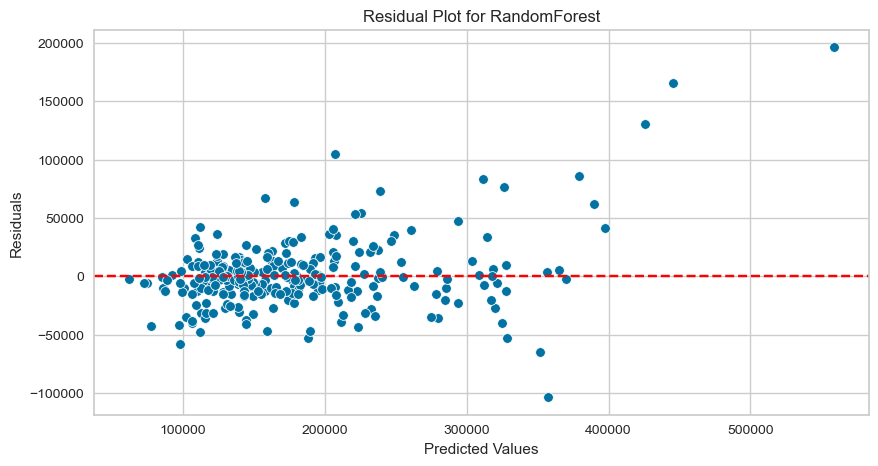

In [71]:
# Predictions from the best RandomForest model
y_pred_rf = best_rf.predict(x_test)

# Residuals
residuals_rf = y_test - y_pred_rf

# Residual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for RandomForest')
plt.show()

Interpretation of residual plot:

- There is Random Distribution which indicates a good fit as there is no apparent pattern.
- There is no Patterns or Curvature therefore the model is not missing a systematic component.
- There is no Increasing/Decreasing Spread therefore the model has Homoscedasticity.

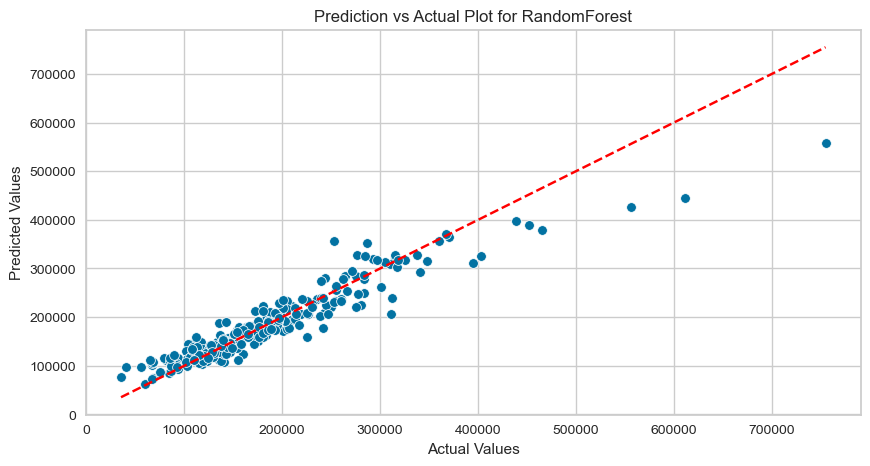

In [72]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot for RandomForest')
plt.show()


Interpretation of prediction vs actual plot

The points are close to the Diagonal Line which indicates good model performance, as the predicted values closely match the actual values.
There are no systematic Deviations therefore there are no biases in the model's predictions.
The aandomscatter around the diagonal line suggests random errors and a good fit overall.


## Conclusion

After applying and tuning three different machine learning models - XGBoost, TensorFlow Neural Network, and RandomForest Regressor - the following results were obtained:

- **XGBoost**:
    - RMSE: 27,999.13
    - R² Score: 0.90

- **TensorFlow Neural Network**:
    - RMSE: 46,173.28
    - R² Score: 0.72

- **RandomForest Regressor**:
    - RMSE: 29132.93
    - R² Score: 0.89

**Comparison**:
The XGBoost model demonstrated the best performance with the lowest RMSE and the highest R² score. This indicates that XGBoost is the most effective at capturing the patterns in the data for predicting house prices. Although the TensorFlow Neural Network and RandomForest Regressor also performed well, their results were slightly less accurate compared to XGBoost.

**Future Work**:
Further improvements could involve:
- Exploring different model architectures or additional machine learning algorithms to identify potentially better solutions.
- Utilizing ensemble methods to combine the strengths of multiple models for improved accuracy and robustness.
- Conducting more in-depth hyperparameter tuning with additional computational resources to further optimize the models.

Overall, the project successfully demonstrates the use of advanced machine learning techniques to predict house prices using a comprehensive dataset. By leveraging different models and tuning their hyperparameters, we were able to achieve significant predictive accuracy, showcasing the practical application of these techniques in real estate data analysis.ing a comprehensive dataset.
